[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/NLP/blob/main/Representation-Learning/Word-RL/Glove.ipynb)

# **Domain Specific Pretrained Glove Using Gensim Library**
Glove is almost same as word2vec just that it has a slightly different objective function
https://nlp.stanford.edu/projects/glove/

In [ ]:
# genism also exposes glove which has been trained on some data already for us, you can use this directly by downloading a table of pre-trained embeddings if the data which it has been 
# trained on is same as the data you are working with

# Trained on wikipedia data --->
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-50') 
# or use glove-wiki-gigaword-300 
# or use glove-wiki-gigaword-200

[==================================================] 100.0% 66.0/66.0MB downloaded


## Seeing Embeddings

##### What's the embedding of 'king'?

In [ ]:
model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

##### Visualizing the embedding vector - Let's plot the vector so we can have a colorful visual of values in the embedding vector

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

Let's plot the embedding of `king`

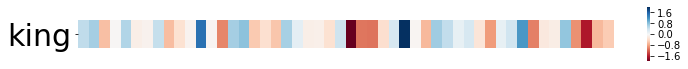

In [ ]:
plot_embeddings([model['king']], ['king'])

We can also compare multiple embeddings:

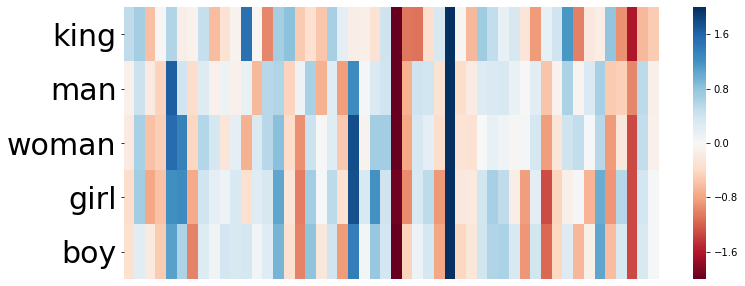

In [ ]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

Here's another example including a number of different concepts:

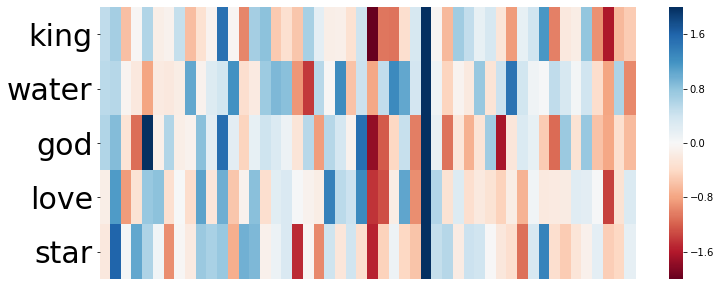

In [ ]:
plot_embeddings([model['king'], model['water'], model['god'], model['love'], model['star']],
              ['king', 'water', 'god', 'love', 'star'])

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


##### How many words does this table have?

In [ ]:
model.vectors.shape

(400000, 50)

Which means:
* 400,000 words (vocab_size)
* Each has an embedding composed of 50 numbers (embedding_size)

## Similarities b/w words

In [ ]:
model.most_similar('obama')

[('barack', 0.9674171805381775),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606046080589294),
 ('mccain', 0.912293553352356),
 ('dole', 0.8878743052482605),
 ('gore', 0.8848039507865906),
 ('hillary', 0.8776552081108093),
 ('rodham', 0.8401790857315063),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [ ]:
model.most_similar('banana')

[('bananas', 0.8152028322219849),
 ('coconut', 0.7872510552406311),
 ('pineapple', 0.757981538772583),
 ('mango', 0.7556401491165161),
 ('beet', 0.7212650179862976),
 ('fruit', 0.7181406617164612),
 ('sugar', 0.7180197834968567),
 ('growers', 0.7165752053260803),
 ('peanut', 0.7018108367919922),
 ('cranberry', 0.6957995295524597)]

In [ ]:
model.most_similar(negative='banana')

[('rw97', 0.8562920093536377),
 ('keyrates', 0.8211416602134705),
 ('horsky', 0.7959502935409546),
 ('k586-1', 0.7915962934494019),
 ('23aou94', 0.7871615886688232),
 ('cw96', 0.7573381662368774),
 ('m.sambucetti', 0.7556723356246948),
 ('falconí', 0.7550509572029114),
 ('clevelands', 0.7533175945281982),
 ('obreja', 0.7505224347114563)]

## Analogies

king - man + woman  = ?

In [ ]:
model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424569725990295),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.7214490175247192),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099430561065674)]

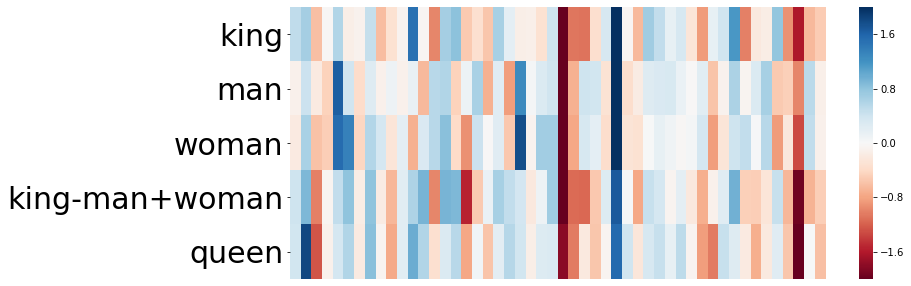

In [ ]:
# visulaizing
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'king-man+woman', 'queen'])

In [ ]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))

array([[0.8609581]], dtype=float32)

Let's compare that to the distance between the result and `king`:

In [ ]:
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.8859834]], dtype=float32)

So the result is more similar to king (0.8859834 similarity score) than it is to queen (0.8609581 similarity score).

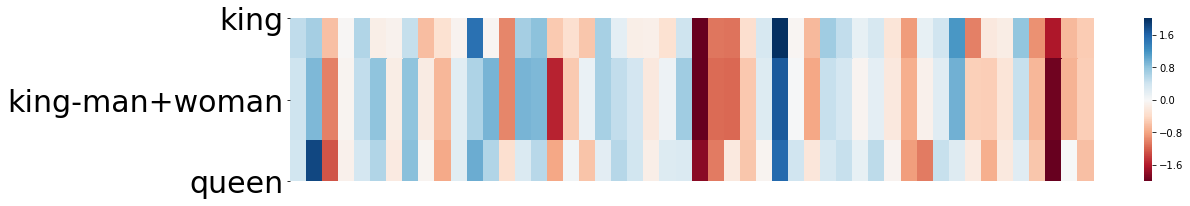

In [ ]:
plot_embeddings( [model['king'],
                 result, 
                 model['queen']],
                 ['king', 'king-man+woman', 'queen'])

doctor - man + woman = ?

In [ ]:
model.most_similar(positive=["doctor", "woman"], negative=["man"])

In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'australia')

'australian'

In [ ]:
analogy('australia', 'beer', 'france')

'champagne'

In [ ]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [ ]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

'dreadful'

# **Fine Tuning**

say you want to use the above already trained models but also train on the data you are working with, so is that possible??? YES